In [153]:
import numpy as np
import nn

import preprocess
import sklearn.datasets
import matplotlib.pyplot as plt

import bmi_io


In [154]:
#load datasets
upperdir = "/Users/jonathanborowsky/PycharmProjects/final-nn/data"

pos_data = bmi_io.read_text_file(f"{upperdir}/rap1-lieb-positives.txt")
neg_data = bmi_io.read_fasta_file(f"{upperdir}/yeast-upstream-1k-negative.fa")


/Users/jonathanborowsky/PycharmProjects/final-nn/data/rap1-lieb-positives.txt


In [155]:
#prepare data for training

#trim negative examples down to size
negatives_trimmed = []
for i in range(len(pos_data)):
    negsampleind = np.random.randint(0,len(neg_data[i])-len(pos_data[i]))
    negatives_trimmed.append(neg_data[i][negsampleind:negsampleind+len(pos_data[i])])

#concatenate examples
observations = negatives_trimmed + pos_data
    
#generate labels
labels = [0]*len(negatives_trimmed) + [1]*len(pos_data)

#balance classes
data_balanced = preprocess.sample_seqs(observations, labels)

obs_1hot = preprocess.one_hot_encode_seqs(data_balanced[0])

print(len(obs_1hot[10]))

# print(len(data_balanced[0]))
# print(len(pos_data))
# print(len(neg_data))

68


In [156]:

#because both the inputs and labels are binary, sigmoid activation functions are used

##lr and batch size were adjusted by trial and error
#epochs was lengthened until the validation loss plateaued

#bce was used since this is a binary classification task

#initialize neural network
test_nn = nn.NeuralNetwork(
    [{'input_dim': 68, 'output_dim': 16, 'activation': 'relu'},
     {'input_dim': 16, 'output_dim': 16, 'activation': 'sigmoid'},
     {'input_dim': 16, 'output_dim': 1, 'activation': 'sigmoid'}],
    lr=.1,
    seed=0,
    batch_size=1,
    epochs=8,
    loss_function="bce"
    )

#prepare training and validation datasets
n_train = 200
#n_val = len(data_balanced)-n_train

x_train = np.array(obs_1hot[0:n_train])
x_val = np.array(obs_1hot[n_train:])
y_train = np.reshape(data_balanced[1][0:n_train], (len(data_balanced[1][0:n_train]),1))
y_val = np.reshape(data_balanced[1][n_train:], (len(data_balanced[1][n_train:]),1))

#fit neural network
fit = test_nn.fit(x_train, y_train, x_val, y_val)


epoch: 0
epoch: 1
epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6
epoch: 7


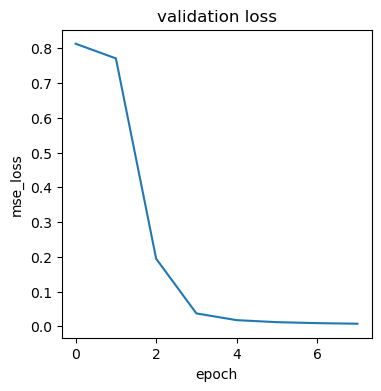

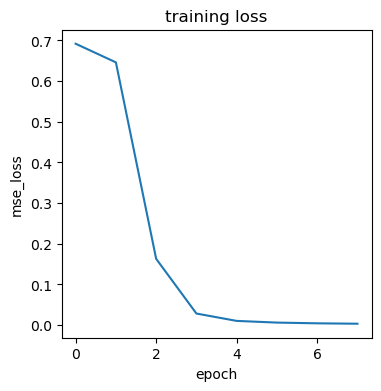

In [157]:
#validation loss
plt.figure(figsize=(4,4))
plt.plot([i for i in range(len(fit[1]))], fit[1])

plt.title("validation loss")
plt.xlabel("epoch")
plt.ylabel("mse_loss")

plt.show()

#training loss
plt.figure(figsize=(4,4))
plt.plot([i for i in range(len(fit[0]))], fit[0])

plt.title("training loss")
plt.xlabel("epoch")
plt.ylabel("mse_loss")

plt.show()


In [158]:
#accuracy on the validation set at the final epoch

print(f"classifier validation BCE loss = {fit[1][-1]}")

classifier validation BCE loss = 0.007540917090017931
